### Algo and ways to reduce noise - Using Qiskit Ignis 

Energy relaxation (Deacy happens after a long time)





In [2]:
from  qiskit import *

In [4]:
nqubits = 3
circ = QuantumCircuit(nqubits, nqubits)
circ.h(0)
circ.cx(0,1)
circ.cx(1,2)
circ.measure([0,1,2],[0,1,2])

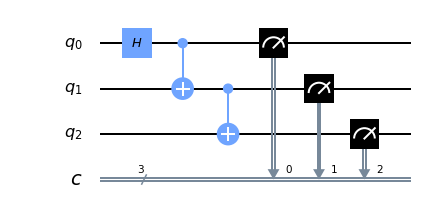

In [6]:
%matplotlib inline 
circ.draw(output='mpl')

In [14]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circ, backend=simulator, shots=1024).result()

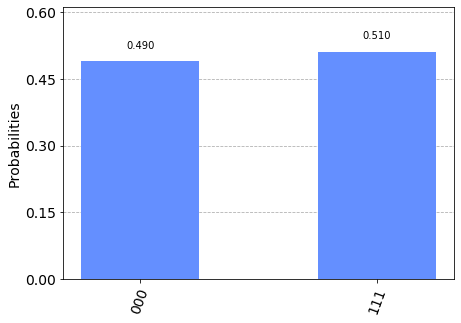

In [16]:
from qiskit.visualization import plot_histogram

plot_histogram(sim_result.get_counts(circ))


In [17]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device=provider.get_backend('ibmqx2')




In [20]:
# execute job on real quatum device 
job = execute(circ, backend=device, shots=1024)

#display the job_id generated by QD(Quantum Device)
print(job.job_id())

# to check status of the job in QD import job_montior 
from qiskit.tools.monitor import job_monitor

#start monitoring of the job in QD, In case of job in Queue, queue status will be displayed
job_monitor(job)


5f0204401234f7001abd40a9
Job Status: job has successfully run


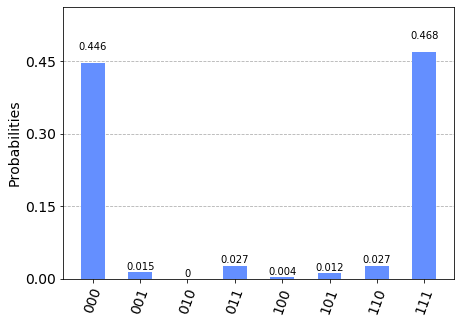

In [22]:
# result of the job would be store in variable, later various info can be extracted
device_result= job.result()
# here count, value of Qb's will be diplayed using histogram chart 
plot_histogram(device_result.get_counts(circ))